---
# Aggregating
---

In [1]:
# ==================================================================================================
# --- Imports
# ==================================================================================================
from study_da.plot import get_title_from_configuration, plot_heatmap
from study_da.postprocess import aggregate_output_data

# ==================================================================================================
# --- Postprocess the study
# ==================================================================================================

df_final = aggregate_output_data(
    "trees/DA_2025_octupole_scan/tree.yaml",
    l_group_by_parameters=["qx_b1", "qy_b1", "i_oct_b1", "i_oct_b2"],
    generation_of_interest=2,
    name_output="output_particles.parquet",
    write_output=True,
    only_keep_lost_particles=True,
    force_overwrite=False,
)


/afs/cern.ch/work/p/phbelang/abp/NLResidual/study-DA/study_da/postprocess/postprocess.py:165: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  [df_grouped[parameter].agg(function_to_aggregate) for parameter in l_parameters_to_keep]


config_1_base.yaml  generation_2.py        NLR_df_HO_ON.parquet      output.txt
error_python.txt    log.txt                output_particles.parquet  run.sh*
error.txt           NLR_df_HO_OFF.parquet  output_python.txt


In [8]:
import pandas as pd
df = pd.read_parquet("trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0000_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-300.0_i_oct_b2_-300.0/NLR_df_HO_OFF.parquet")

In [9]:
df

,rx,ry,r,angle,residual
0,3.965779,0.522105,4.000000,0.130900,0.000932
1,4.102530,0.540108,4.137931,0.130900,0.000996
2,4.239281,0.558112,4.275862,0.130900,0.001062
3,4.376032,0.576116,4.413793,0.130900,0.001130
4,4.512784,0.594119,4.551724,0.130900,0.001199
...,...,...,...,...,...
325,0.972195,7.384555,7.448276,1.439897,0.001760
326,0.990199,7.521306,7.586207,1.439897,0.001837
327,1.008202,7.658057,7.724138,1.439897,0.001918
328,1.026206,7.794808,7.862069,1.439897,0.002002


In [ ]:
NLR_final = aggregate_output_data(
    "trees/DA_2025_octupole_scan/tree.yaml",
    l_group_by_parameters=["qx_b1", "qy_b1", "i_oct_b1", "i_oct_b2"],
    generation_of_interest=2,
    name_output="output_particles.parquet",
    write_output=True,
    only_keep_lost_particles=True,
    force_overwrite=False,
)

['mass0',
 'parent_particle_id',
 'ax',
 'pdg_id',
 'start_tracking_at_element',
 'state',
 'at_element',
 '_rng_s3',
 'px',
 'py',
 'charge_ratio',
 'ay',
 'particle_id',
 'q0',
 'y',
 'weight',
 'zeta',
 '_rng_s4',
 'x',
 '_rng_s1',
 'chi',
 'at_turn',
 't_sim',
 's',
 '_rng_s2',
 'delta',
 'ptau',
 'rvv',
 'rpp',
 'p0c',
 'beta0',
 'gamma0',
 'normalized amplitude in xy-plane',
 'angle in xy-plane [deg]',
 'name base collider',
 'optics_file',
 'beam_energy_tot_b1',
 'beam_energy_tot_b2',
 'ions',
 'ver_hllhc_optics',
 'ver_lhc_run',
 'qx_b1',
 'qx_b2',
 'qy_b1',
 'qy_b2',
 'dqx_b1',
 'dqx_b2',
 'dqy_b1',
 'dqy_b2',
 'delta_cmr',
 'delta_cmi',
 'i_oct_b1',
 'i_oct_b2',
 'on_disp',
 'on_alice_normalized',
 'on_lhcb_normalized',
 'on_x1',
 'on_x2h',
 'on_x2v',
 'on_x5',
 'on_x8h',
 'on_x8v',
 'on_sep1',
 'on_sep2h',
 'on_sep2v',
 'on_sep5',
 'on_sep8h',
 'on_sep8v',
 'beta_x_ip1',
 'beta_y_ip1',
 'beta_x_ip2',
 'beta_y_ip2',
 'beta_x_ip5',
 'beta_y_ip5',
 'beta_x_ip8',
 'beta_y_ip8',


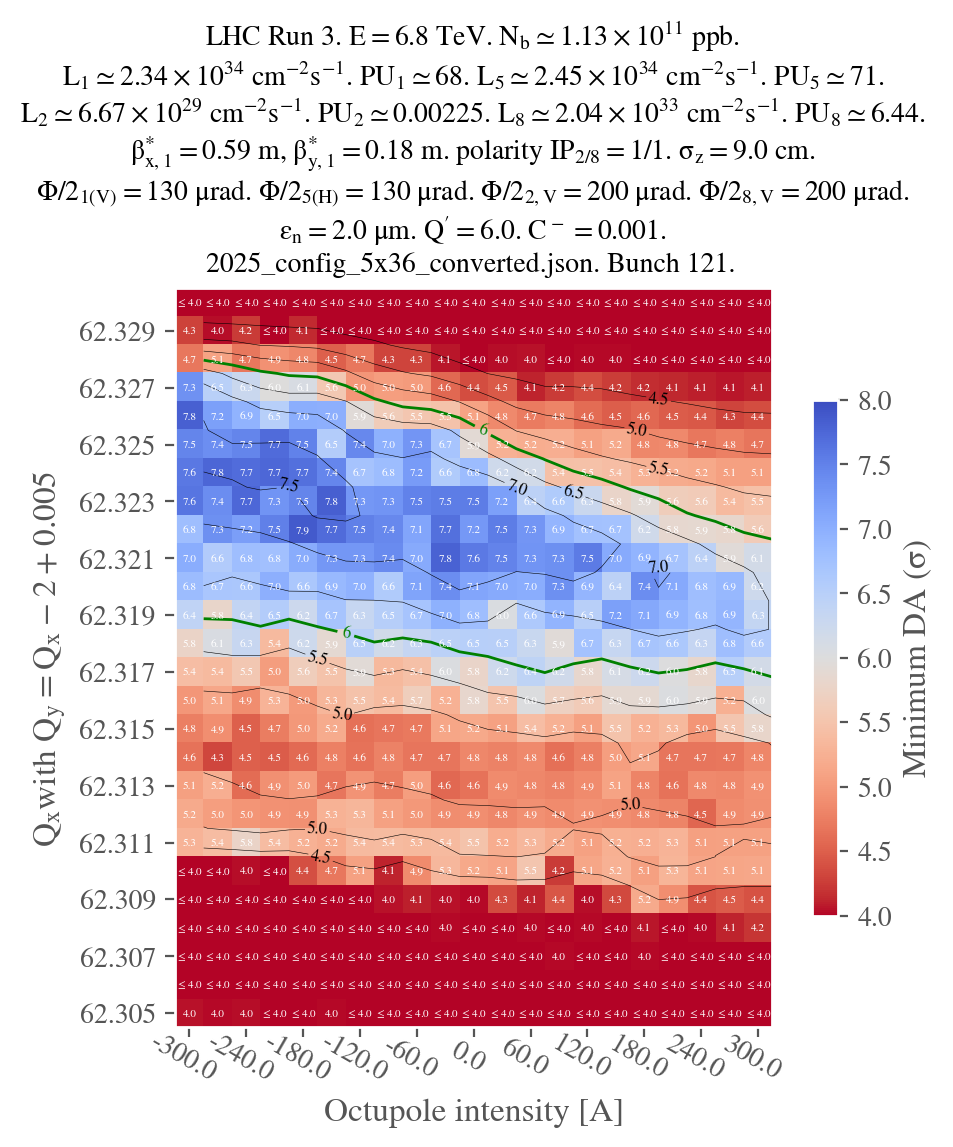

In [2]:

# ==================================================================================================
# --- Plot
# ==================================================================================================

title = get_title_from_configuration(
    df_final,
    crossing_type="vh",
    display_LHC_version=True,
    display_energy=True,
    display_bunch_index=True,
    display_CC_crossing=False,
    display_bunch_intensity=True,
    display_beta=True,
    display_crossing_IP_1=True,
    display_crossing_IP_2=True,
    display_crossing_IP_5=True,
    display_crossing_IP_8=True,
    display_bunch_length=True,
    display_polarity_IP_2_8=True,
    display_emittance=True,
    display_chromaticity=True,
    display_octupole_intensity=False,
    display_coupling=True,
    display_filling_scheme=True,
    display_tune=False,
    display_luminosity_1=True,
    display_luminosity_2=True,
    display_luminosity_5=True,
    display_luminosity_8=True,
    display_PU_1=True,
    display_PU_2=True,
    display_PU_5=True,
    display_PU_8=True,
)

fig, ax = plot_heatmap(
    df_final,
    horizontal_variable="i_oct_b1",
    vertical_variable="qx_b1",
    color_variable="normalized amplitude in xy-plane",
    plot_contours=True,
    xlabel="Octupole intensity [A]",
    ylabel=r"$Q_x$" + "with " + r"$Q_y = Q_x -2 + 0.005$",
    title=title,
    vmin=4.0,
    vmax=8.0,
    green_contour=6.0,
    label_cbar="Minimum DA (" + r"$\sigma$" + ")",
    output_path="oct_scan.png",
    vectorize=False,
    xaxis_ticks_on_top=False,
    plot_diagonal_lines=False,
)

In [ ]:
from pathlib import Path


[PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0000_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-300.0_i_oct_b2_-300.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0001_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-270.0_i_oct_b2_-270.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0002_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-240.0_i_oct_b2_-240.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0003_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-210.0_i_oct_b2_-210.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0004_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-180.0_i_oct_b2_-180.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0005_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-150.0_i_oct_b2_-150.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2

In [ ]:
import dask.dataframe as dd
import numpy as np
from pathlib import Path
from dask import delayed, compute
from rich.progress import track
import pandas as pd

# Parameters
# collection = "trees/DA_2025_octupole_scan/"  # Replace with your directory
collection = "trees/NLR_2025_octupole_scan_5t/"  # Replace with your directory
filename   = 'NLR_df_HO_ON.parquet'


# Find all relevant files
file_list = list(Path(collection).glob('**/' + filename))


# Function to process each file
def process_file(file,ref_at = 4):
    # Read the file as a Dask DataFrame
    df = dd.read_parquet(file)
    
    # Filter the region of interest
    roi = (df["r"] - ref_at).abs() < 0.2

    # Get maximum residual in ROI
    max_residual = df[roi]["residual"].max().compute()  # Compute max residual in ROI
    
    # Extract config value

    file_metadata = file.parents[0].name.split("_")
    id_name = file_metadata[file_metadata.index('ID')+1]
    qx = float(file_metadata[file_metadata.index('qx')+1])
    qy = float(file_metadata[file_metadata.index('qy')+1])
    i_oct = float(file_metadata[file_metadata.index('b1')+1])
    
    # Return extracted values
    return id_name,qx,qy,i_oct,max_residual,

# Create delayed tasks for each file
tasks = [delayed(process_file)(file) for file in file_list]

# Compute results in parallel
results = compute(*tasks)

# Create a DataFrame from the results
df = pd.DataFrame(results,columns=["id_name","qx","qy","i_oct","max_residual"]).sort_values("id_name")

In [14]:
df

,id_name,qx,qy,i_oct,max_residual
0,0000,62.305,60.310,-300.0,0.011499
1,0001,62.305,60.310,-270.0,0.011399
2,0002,62.305,60.310,-240.0,0.011683
3,0003,62.305,60.310,-210.0,0.011972
4,0004,62.305,60.310,-180.0,0.012265
...,...,...,...,...,...
2715,2725,62.330,60.335,180.0,0.019742
2716,2726,62.330,60.335,210.0,0.019342
2717,2727,62.330,60.335,240.0,0.018946
2718,2728,62.330,60.335,270.0,0.018589


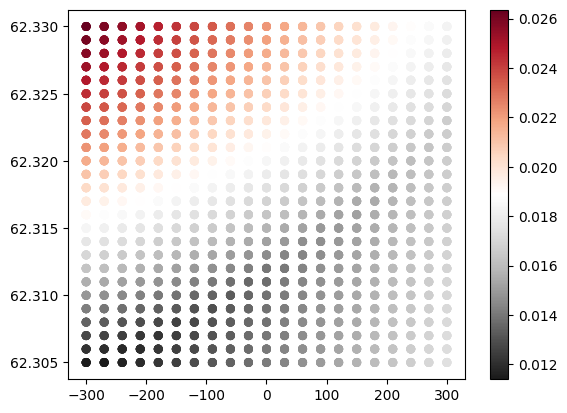

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

vcenter = df.max_residual.mean()
vmin    = df.max_residual.min()
# vmax    = df.max_residual.max()
vmax = vcenter * 1.1
vmin = vcenter / 1.1

data_NLR = {'x':df.i_oct,'y':df.qx,'c':df.max_residual,'cmap':'RdGy_r','s':30}#,'norm':colors.LogNorm(vmin=vmin, vmax=vmax)}


# clear_output()


plt.figure()
plt.scatter(**data_NLR)
plt.colorbar()


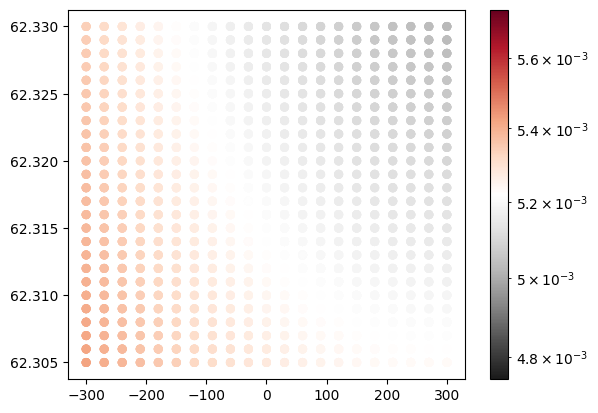

In [26]:

import matplotlib.pyplot as plt
import matplotlib.colors as colors

vcenter = df.max_residual.mean()
vmin    = df.max_residual.min()
# vmax    = df.max_residual.max()
vmax = vcenter * 1.1
vmin = vcenter / 1.1

data_NLR = {'x':df.i_oct,'y':df.qx,'c':df.max_residual,'cmap':'RdGy_r','s':30,'norm':colors.LogNorm(vmin=vmin, vmax=vmax)}


# clear_output()


plt.figure()
plt.scatter(**data_NLR)
plt.colorbar()


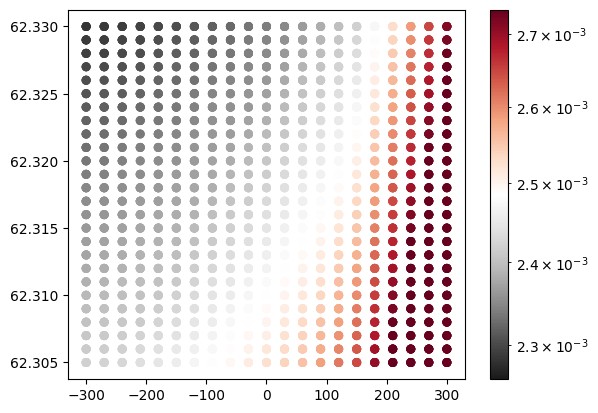

In [22]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

vcenter = df.max_residual.mean()
vmin    = df.max_residual.min()
# vmax    = df.max_residual.max()
vmax = vcenter * 1.1
vmin = vcenter / 1.1

data_NLR = {'x':df.i_oct,'y':df.qx,'c':df.max_residual,'cmap':'RdGy_r','s':30,'norm':colors.LogNorm(vmin=vmin, vmax=vmax)}


# clear_output()


plt.figure()
plt.scatter(**data_NLR)
plt.colorbar()

In [8]:
file_metadata = file_list[0].parents[0].name.split("_")
qx = float(file_metadata[file_metadata.index('qx')+1])
qy = float(file_metadata[file_metadata.index('qy')+1])
i_oct = float(file_metadata[file_metadata.index('b1')+1])
qx,qy,i_oct

(62.305, 60.31, -300.0)

In [7]:
file_metadata



['ID',
 '0000',
 'distribution',
 'file',
 '00',
 'qx',
 '62.305',
 'qy',
 '60.31',
 'i',
 'oct',
 'b1',
 '-300.0',
 'i',
 'oct',
 'b2',
 '-300.0']

In [ ]:
import pandas as pd


,max_residual,id_name
0,0.002419,0000
1,0.002423,0001
2,0.002428,0002
3,0.002437,0003
4,0.002448,0004
...,...,...
2513,0.002473,2725
2514,0.002530,2726
2515,0.002589,2727
2516,0.002649,2728


In [ ]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
from pathlib import Path
from rich.progress import track

# Parameters
collection = "trees/DA_2025_octupole_scan/"  # Replace with your directory
filename = "NLR_df_HO_OFF.parquet"

# Find all relevant files
file_list = list(Path(collection).glob(f"**/{filename}"))

# Function to process each file
def process_file(file, ref_at=6):
    # Read the file with Dask, load only necessary columns
    df = dd.read_parquet(file, columns=["residual", "r"])
    
    # Filter the region of interest (ROI)
    df["roi"] = (df["r"] - ref_at).abs() < 0.2
    
    # Compute maximum residual in ROI
    max_residual = df[df["roi"]]["residual"].max().compute()

    # Extract file ID from the folder name
    folder_name = file.parent.name
    id_name = folder_name.split("_")[1]

    # Return the ID and max residual
    return id_name, max_residual

# Process files and collect results
results = []
for file in track(file_list, description="Processing files"):
    results.append(process_file(file))

# Convert results to a DataFrame
final_df = pd.DataFrame(results, columns=["ID", "Max Residual"])

print(final_df)


Output()

In [4]:
import dask as dd
import numpy as np
from pathlib import Path
from dask import delayed, compute
from rich.progress import track

# Parameters
collection = "trees/DA_2025_octupole_scan/"  # Replace with your directory
filename   = 'NLR_df_HO_OFF.parquet'


# Find all relevant files
file_list = list(Path(collection).glob('**/' + filename))



In [16]:
%ls trees/DA_2025_octupole_scan/ID_0_generation_1/

collider_file_for_configuration.json.zip
config_1_base.yaml
generation_1.py
ID_0000_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-300.0_i_oct_b2_-300.0/
ID_0001_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-270.0_i_oct_b2_-270.0/
ID_0002_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-240.0_i_oct_b2_-240.0/
ID_0003_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-210.0_i_oct_b2_-210.0/
ID_0004_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-180.0_i_oct_b2_-180.0/
ID_0005_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-150.0_i_oct_b2_-150.0/
ID_0006_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-120.0_i_oct_b2_-120.0/
ID_0007_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-90.0_i_oct_b2_-90.0/
ID_0008_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-60.0_i_oct_b2_-60.0/
ID_0009_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-30.0_i_oct_b2_-30.0/
ID_0010_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_0.0_i_oct_b2_0.0/
ID_0011_distribution_file_00_qx_62.305_qy_60.

In [1]:
import dask.dataframe as dd

[PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0000_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-300.0_i_oct_b2_-300.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0001_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-270.0_i_oct_b2_-270.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0002_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-240.0_i_oct_b2_-240.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0003_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-210.0_i_oct_b2_-210.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0004_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-180.0_i_oct_b2_-180.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2025_octupole_scan/ID_0_generation_1/ID_0005_distribution_file_00_qx_62.305_qy_60.31_i_oct_b1_-150.0_i_oct_b2_-150.0/NLR_df_HO_OFF.parquet'),
 PosixPath('trees/DA_2

In [ ]:
import dask.dataframe as dd
import numpy as np
from pathlib import Path

# Parameters
collection = "trees/DA_2025_octupole_scan/ID_0_generation_1/"  # Replace with your directory
columns = ["residual","r"]  # Only load necessary columns
REF_at = 6
config = {"d_normalized": False}

# Read all files into a single Dask DataFrame
# df = dd.read_parquet(f"{collection}/OUT_JOB_*.parquet", columns=columns)
_partition = dd.read_parquet(collection,columns=columns,parquet_file_extension = 'NLR_df_HO_OFF.parquet')
df = _partition.compute()

# Add a column for filtering the region of interest (ROI)
df["roi"] = (df["r"] - REF_at).abs() < 0.2

In [ ]:
import dask.dataframe as dd
import pandas as pd
from pathlib import Path

# Parameters
collection = "trees/DA_2025_octupole_scan/"  # Base directory
filename = "NLR_df_HO_OFF.parquet"  # File pattern
columns = ["residual", "r"]  # Only load necessary columns
REF_at = 6  # Reference value

# Get a list of Parquet files
file_list = list(Path(collection).glob(f"**/{filename}"))

# Read and process each file, adding metadata
dfs = []
for file in file_list:
    # Load the parquet file
    df = dd.read_parquet(file, columns=columns)
    
    # Extract folder or file ID (adjust parsing logic as needed)
    folder_name = file.parent.name  # E.g., 'ID_0_generation_1'
    file_id = folder_name.split("_")[1]  # Extract ID ('0' in this case)
    
    # Add file ID as a new column
    df = df.assign(file_id=file_id)
    
    # Append to list
    dfs.append(df)

# Combine all DataFrames into one
combined_df = dd.concat(dfs)

# Add a column for filtering the region of interest (ROI)
combined_df["roi"] = (combined_df["r"] - REF_at).abs() < 0.2

# Group by file ID and calculate the maximum residual for each group
result = combined_df[combined_df["roi"]].groupby("file_id")["residual"].max().compute()

# Convert to a pandas DataFrame for final output
final_df = result.reset_index()
final_df.columns = ["ID", "Max Residual"]

print(final_df)


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f38c9e5d460>>
Traceback (most recent call last):
  File "/home/phbelang/base/miniforge/envs/py-NLR/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [8]:
import dask.dataframe as dd
import numpy as np
from pathlib import Path

# Parameters
collection = "trees/DA_2025_octupole_scan/ID_0_generation_1/"  # Replace with your directory
columns = ["residual", "r"]  # Only load necessary columns
REF_at = 6

# List all Parquet files with the specified extension
file_list = sorted(Path(collection).glob("**/NLR_df_HO_OFF.parquet"))

# Create a Dask DataFrame for each file and add the folder name as a column
dfs = []
for file in file_list:
    # Read the parquet file
    df = dd.read_parquet(file, columns=columns)
    
    # Add a column with the folder name
    folder_name = file.parent.name  # Extract folder name
    df = df.assign(folder_name=folder_name)
    
    dfs.append(df)

# Combine all DataFrames into one
df = dd.concat(dfs)

# Compute to finalize processing (optional)
df = df.compute()

# Add a column for filtering the region of interest (ROI)
df["roi"] = (df["r"] - REF_at).abs() < 0.2

print(df.head())


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def import_parquet_datafile(path,partition_dict,columns = None,complex_columns = None,filters = None):
                   
    # -- DASK ----
    import dask.dataframe as dd
    import dask.config as ddconfig
    import gc
    ddconfig.set({"dataframe.convert-string": False})
    ddconfig.set({'dataframe.query-planning-warning': False})
    # https://dask.discourse.group/t/ddf-is-converting-column-of-lists-dicts-to-strings/2446
    #-------------



    # Setting up the filters
    #-----------------------------
    if filters is None:
        filters = [[]]
    
    partitionning = [(key, '==', val) for key,val in partition_dict.items()]
    filters = [f +partitionning for f in filters]

    assert ('data' in partition_dict.keys()), 'The partition_dict must contain data: ["naff","exursion","checkpoint","tbt"] to find datafile'
    parquet_file_extension = f'{partition_dict["data"]}_datafile_0.parquet'
    #-----------------------------
    
    # Importing the data
    #-----------------------------
    _partition = dd.read_parquet(path,columns=columns,filters = filters,parquet_file_extension = parquet_file_extension)
    df         = _partition.compute()
    #-----------------------------

    # Cleaning up the dataframe
    #-----------------------------
    if 'window' in df.columns:
        df = df[['window'] + [col for col in df.columns if col != 'window']]
    if 'chunk' in df.columns:
        df = df[['chunk'] + [col for col in df.columns if col != 'chunk']]
    
    df = df.reset_index(drop=True).drop(columns = list(partition_dict.keys()))
    #-----------------------------

    # Removing raw data
    #-----------------------------
    del(_partition)
    gc.collect()
    #-----------------------------

    # Parsing complex columns
    #-----------------------------
    if complex_columns is not None:
        for col in complex_columns:
            df[col] = df[col].apply(parse_parquet_complex)
    #-----------------------------
            
    return df
#========================================